In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from geneview.algorithm import hierarchical_cluster

In [3]:
X = np.array([[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]])
d = hierarchical_cluster(data=X, axis=0)
d.dendrogram

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.5, 1.5, 1.0],
  [0.0, 3.25, 3.25, 1.5],
  [1.0, 7.266666666666667, 7.266666666666667, 3.25]],
 'ivl': ['1', '5', '6', '3', '2', '7', '0', '4'],
 'leaves': [1, 5, 6, 3, 2, 7, 0, 4],
 'color_list': ['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0']}

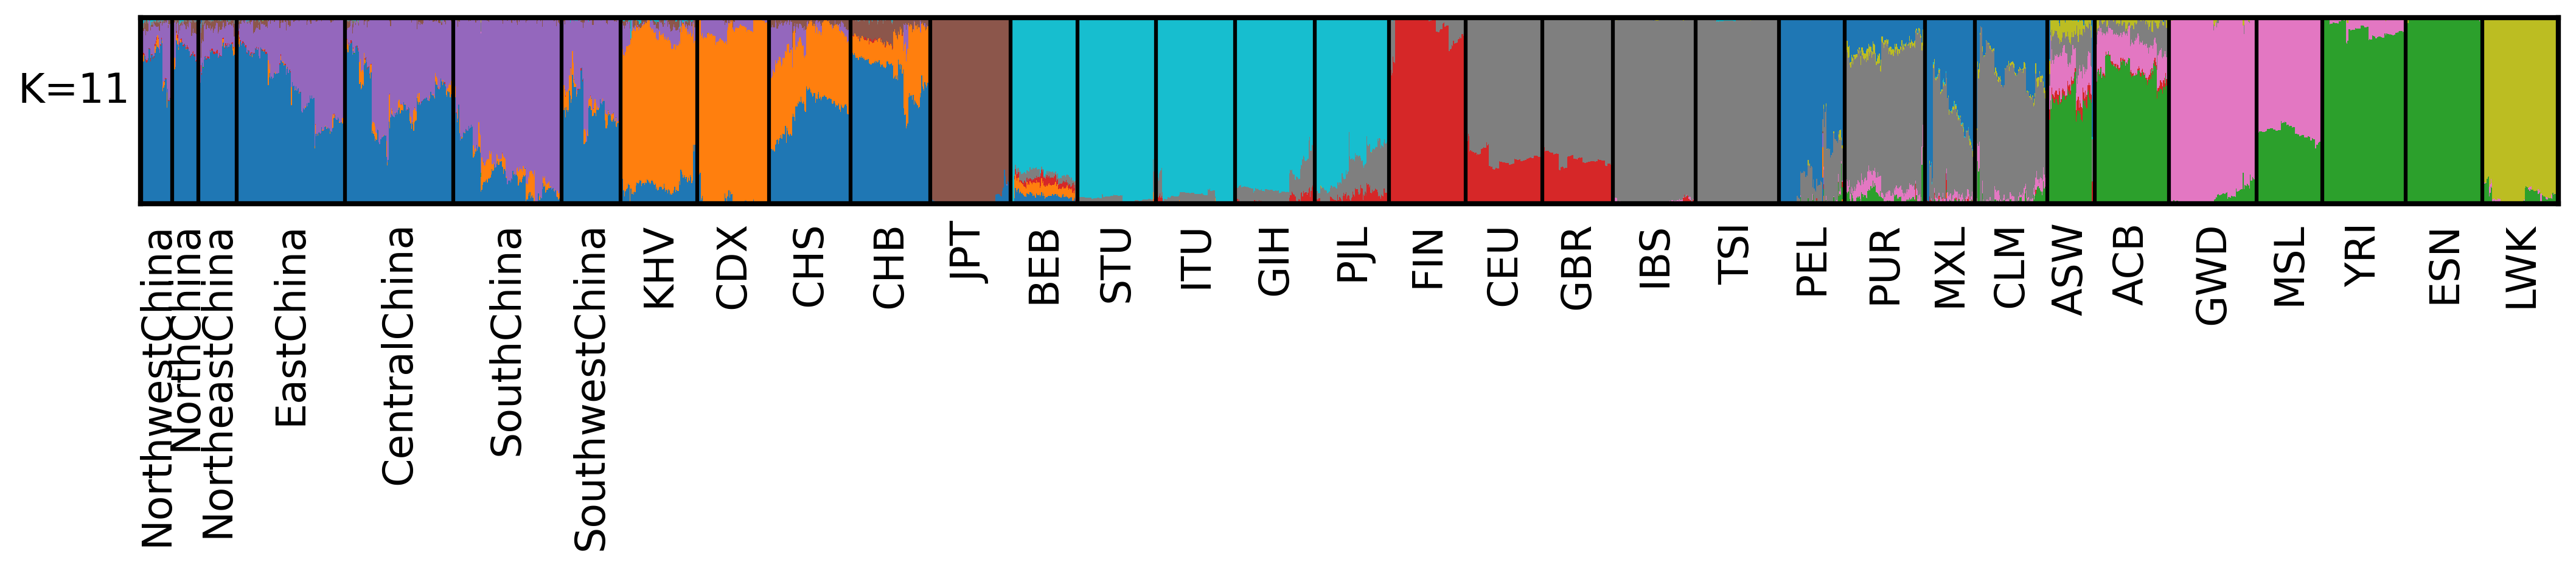

In [7]:
from itertools import cycle

params = {"legend.fontsize": 14,
          "axes.labelsize": 16,
          "xtick.labelsize": 14,
          "ytick.labelsize": 14}
plt.rcParams.update(params)

def plot_admixture(
    data=None, group_order=None, palette=None, xticklabels=None, xticklabel_kws=None, ax=None
):
    """Plot admixture."""
    # From tab10
    TAB10 = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
             "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"] 
    palette = cycle(TAB10 if palette is None else palette)
        
    if group_order is None:
        group_order = set(data.keys())
    
    n = 0
    for g in group_order:
        n += len(data[g])
        hc = hierarchical_cluster(data=data[g], axis=0)
        data[g] = hc.data.iloc[hc.reordered_index]
        
    x = np.arange(n)
    K = data[group_order[0]].columns
    
    add = np.zeros(len(x))
    for k in K:
        c = next(palette)  # one color for one 'k'

        start_g_pos = 0
        tmp = []
        for g in group_order:  # make group order
            y = data[g][k]
            end_g_pos = start_g_pos + len(y)
            ax.bar(x[start_g_pos:end_g_pos],
                   y,
                   bottom=add[start_g_pos:end_g_pos],
                   color=c, 
                   width=1.0, 
                   linewidth=0, 
                   edgecolor=None)
            start_g_pos = end_g_pos
            tmp.append(y)
        add += np.array(pd.concat(tmp, axis=0))
    
    g_pos = 0
    xticks_pos = []
    for g in group_order:  # make group order
        g_size = len(data[g][k])
        xticks_pos.append(g_pos + 0.5 * g_size)
        
        g_pos += g_size
        ax.axvline(x=g_pos, color="k", lw=1.5)

    ax.spines["left"].set_linewidth(2)
    ax.spines["top"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([0, 1.0])
    
    if xticklabel_kws is None:
        xticklabel_kws = {}
        
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(group_order if xticklabels is None else xticklabels, 
                       fontsize=params["axes.labelsize"], 
                       # params["xtick.labelsize"],  # params["axes.labelsize"], 
                       **xticklabel_kws)
    
    ax.tick_params(bottom=False,top=False,left=False,right=False)
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_ylabel("K=%d" % len(K), rotation=0, ha="right")
    
    
    return ax


#################################

pop_group_bigcs = ["NorthwestChina", "NorthChina", "NortheastChina", "EastChina", 
                   "CentralChina", "SouthChina", "SouthwestChina"]
pop_group_1kg = ["KHV", "CDX", "CHS", "CHB", "JPT", "BEB", "STU", "ITU", "GIH", "PJL", "FIN", 
                 "CEU", "GBR", "IBS", "TSI", "PEL", "PUR", "MXL", "CLM", "ASW", "ACB", "GWD", 
                 "MSL", "YRI", "ESN", "LWK"]

df = pd.read_table("../../examples/data/admixture.output.Q", sep=" ", header=None)
sample_info = pd.read_table("../../examples/data/admixture_population.info", sep="\t", header=None, names=["Group"])
popset = set(sample_info["Group"])

data = {}
for g in popset:
    g_data = df[sample_info["Group"]==g].copy()
    # Sampling: keep less than 140 samples for each group
    data[g] = g_data.sample(n=140, random_state=100) if len(g_data)>140 else g_data


### Plot
f, ax = plt.subplots(1, 1, figsize=(14, 3), facecolor="w", constrained_layout=True, dpi=300)
plot_admixture(data=data,
               group_order=pop_group_bigcs+pop_group_1kg,
               xticklabel_kws={"rotation": "vertical"},
               ax=ax)
plt.show()

In [5]:
df.sample?